ในการทำงานบางครั้งเราต้องการข้อมูลรูปภาพ นอกเหนือจากที่อยู่ใน Dataset เราต้องการป้อนข้อมูล Input รูปภาพจากโลกของความเป็นจริง แบบ Real-time หนึ่งในวิธีที่สะดวก และเป็นที่นิยม คือ การใช้กล้อง Webcam ที่อยู่ในโน้ตบุ๊คเกือบทุกเครื่อง ถ่ายภาพตัวเราเอง หรือถ้ามีกล้องอื่น ๆ ต่อผ่าน USB ก็สามารถใช้ได้เช่นกัน

# 0. Import 

Import Library ที่จำเป็นต้องใช้ ในการเรียก Javascript ใน Web Browser และแสดงผลรูปภาพ

In [0]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js

from base64 import b64decode
import numpy as np
import io
import PIL

import matplotlib.pyplot as plt

# 1. ถ่ายภาพด้วยกล้องหน้า

เราจะใช้ Google Colab สั่ง Webcam ที่มีอยู่ในทุกคอมพิวเตอร์โน้ตบุ๊ค ถ่ายภาพ เพื่อมาใช้ในการประมวลผลต่อไป 

ในทางเทคนิคแล้ว เราจะไปเรียกใช้ Javascript ไปสั่งให้ Web Browser ขอสิทธิ์ และถ่ายภาพให้เราอีกที

In [0]:
def take_photo(filename=None, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for video to be clicked.
      await new Promise((resolve) => video.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])

  if filename is None:
    ## return numpy array
    f = io.BytesIO(binary)
    return np.asarray(PIL.Image.open(f))
  else:
    # save file and return length of file
    with open(filename, 'wb') as f:
        f.write(binary)
    return len(binary)

# 2. ถ่ายภาพ เป็น Numpy Array

คลิกที่รูปเพื่อกดชัตเตอร์ ถ้าเราไม่ใส่ชื่อไฟล์ ฟังก์ชันจะ return เป็น numpy array 3 มิติ

In [29]:
img = take_photo() # click
img.shape

<IPython.core.display.Javascript object>

(480, 640, 3)

ใช้ matplotlib แสดงรูปที่ถ่ายไว้ด้านบน

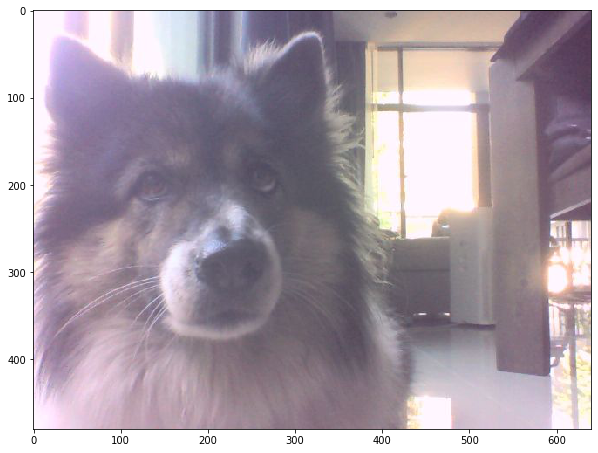

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# 3. ถ่ายภาพแล้ว เซฟเป็นไฟล์

คลิกที่รูปเพื่อกดชัตเตอร์ ถ้าเราใส่ชื่อไฟล์ ฟังก์ชันจะ return เซฟไฟล์ในชื่อนั้น และ return ความยาวของไฟล์

In [31]:
filename = "photo01.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

31897

ลอง ls ดูว่ามีไฟล์ชื่อที่กำหนดหรือไม่

In [32]:
!ls

photo01.jpg  sample_data


เปิดไฟล์ขึ้นมา แสดงรูปภาพที่ถ่ายไว้ด้านบน

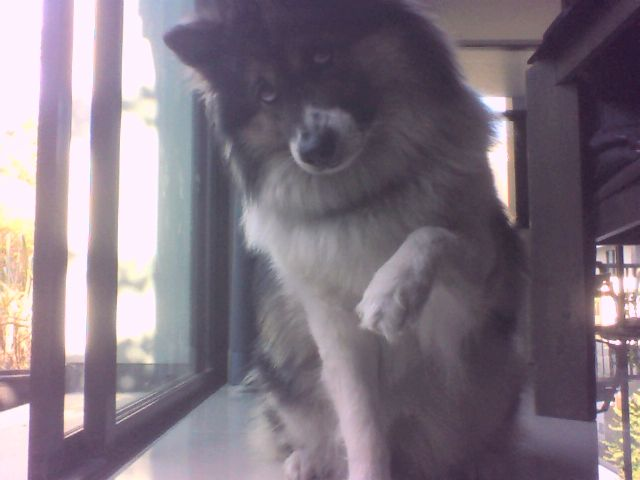

In [33]:
display(Image(filename))

# Credit

* https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi
* https://colab.research.google.com/gist/ricardodeazambuja/058f4c242fe67ec2d86ca2596b0905ad/webcam-to-numpy-array-from-your-browser-in-colab.ipynb#scrollTo=58dO8mqemQyZ